# Summarising the Relationship Between Two Variables

## Associations: Two Quantitative Variables



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

housing = pd.read_csv('housing_sample.csv')

display(housing.head())

,price,type,sqfeet,beds,baths,lat,long
0,615,apartment,364,0,1.0,35.1653,-101.8840
1,1346,apartment,816,1,1.0,32.9865,-96.6860
2,900,apartment,500,1,1.0,30.2355,-97.7292
3,650,apartment,700,1,1.0,26.1923,-98.2657
4,1330,apartment,1040,2,2.0,30.6380,-96.2940


In [2]:
type_props = housing.type.value_counts(normalize=True)
print(type_props)

apartment        0.882554
house            0.059426
manufactured     0.017266
townhouse        0.016061
condo            0.010841
duplex           0.008834
loft             0.002409
flat             0.001807
cottage/cabin    0.000602
in-law           0.000201
Name: type, dtype: float64


### Scatter Plots

One of the best ways to quickly visualize the relationship between quantitative variables is to plot them against each other in a scatter plot. This makes it easy to look for patterns or trends in the data.

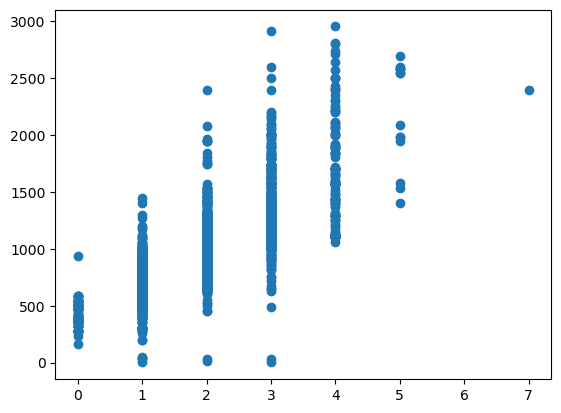

In [3]:
plt.scatter(x=housing.beds, y=housing.sqfeet)
plt.show()

### Exploring Covariance

Beyond visualizing relationships, we can also use summary statistics to quantify the strength of certain associations. Covariance is a summary statistic that describes the strength of a linear relationship. A linear relationship is one where a straight line would best describe the pattern of points in a scatter plot.

Covariance can range from negative infinity to positive infinity. A positive covariance indicates that a larger value of one variable is associated with a larger value of the other. A negative covariance indicates a larger value of one variable is associated with a smaller value of the other. A covariance of 0 indicates no linear relationship. 

In [4]:
# calculate and print covariance matrix:
cov_mat_sqfeet_beds = np.cov(housing.beds, housing.sqfeet)
print(cov_mat_sqfeet_beds)

# store the covariance as cov_sqfeet_beds
cov_sqfeet_beds = cov_mat_sqfeet_beds[0][1]
print(cov_sqfeet_beds)

[[7.24471949e-01 2.28223306e+02]
 [2.28223306e+02 1.10668978e+05]]
228.2233061940595


### Correlation- Part 1

Like covariance, Pearson Correlation (often referred to simply as “correlation”) is a scaled form of covariance. It also measures the strength of a linear relationship, but ranges from -1 to +1, making it more interpretable.

Highly associated variables with a positive linear relationship will have a correlation close to 1. Highly associated variables with a negative linear relationship will have a correlation close to -1. Variables that do not have a linear association (or a linear association with a slope of zero) will have correlations close to 0.

The `pearsonr()` function from `scipy.stats` can be used to calculate correlation as follows:

In [5]:
from scipy.stats import pearsonr


0.8060022524416044


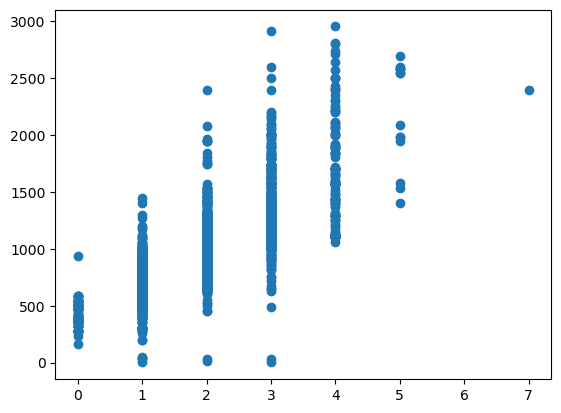

In [6]:

# calculate corr_sqfeet_beds and print it out:
corr_sqfeet_beds, p = pearsonr(housing.beds, housing.sqfeet)
print(corr_sqfeet_beds)

# create the scatter plot here:
plt.scatter(x=housing.beds, y=housing.sqfeet)
plt.show()

### Correlation Part 2

It’s important to note that there are some limitations to using correlation or covariance as a way of assessing whether there is an association between two variables. Because correlation and covariance both measure the strength of linear relationships with non-zero slopes, but not other kinds of relationships, correlation can be misleading.

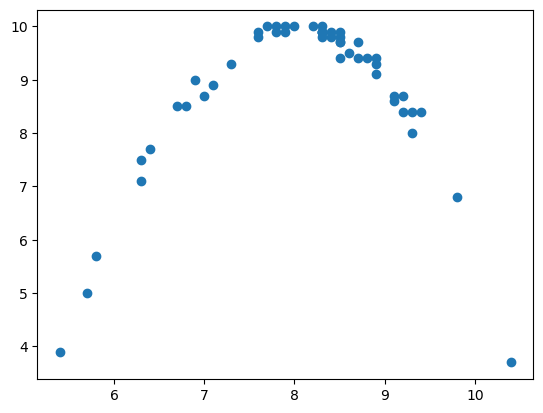

0.2814978189049413


In [7]:
sleep = pd.read_csv('sleep_performance.csv')

# create your scatter plot here:
plt.scatter(x=sleep.hours_sleep, y=sleep.performance)
plt.show()

# calculate the correlation for `hours_sleep` and `performance`:
corr_sleep_performance, p = pearsonr(sleep.hours_sleep, sleep.performance)
print(corr_sleep_performance)

### Review

As a final exercise, a new dataset named `penguins` has been uploaded for you. This dataset contains various measurements for a sample of penguins.

In [8]:
np.set_printoptions(suppress=True, precision = 1) 

penguins = pd.read_csv('penguins.csv')

In [9]:
# Inspect the first few rows of data
display(penguins.head())

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,39.1,18.7,181.0,3750.0,male
1,Adelie,39.5,17.4,186.0,3800.0,female
2,Adelie,40.3,18.0,195.0,3250.0,female
3,Adelie,36.7,19.3,193.0,3450.0,female
4,Adelie,39.3,20.6,190.0,3650.0,male


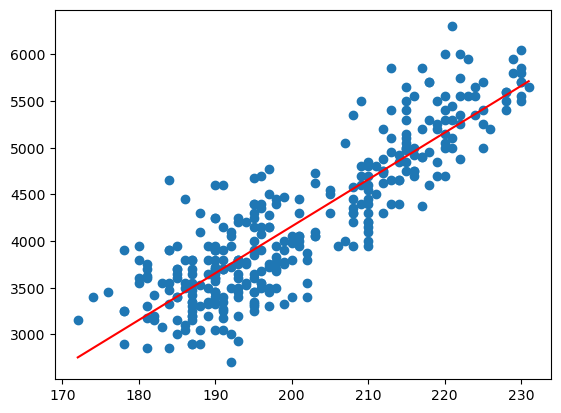

50.153265942241106


In [14]:
# Create a scatter plot of flipper length (flipper_length_mm) and body mass (body_mass_g)
plt.scatter(x=penguins.flipper_length_mm, y=penguins.body_mass_g)
# create a line of best fit:
plt.plot(np.unique(penguins.flipper_length_mm), np.poly1d(np.polyfit(penguins.flipper_length_mm, penguins.body_mass_g, 1))(np.unique(penguins.flipper_length_mm)), color='red')
plt.show()

# print the gradient of the line of best fit
print(np.polyfit(penguins.flipper_length_mm, penguins.body_mass_g, 1)[0])

In [11]:
# Inspect your plot. What is the relationship between these variables?
## The relationship is positive, linear, and strong.

# Calculate the covariance matrix for flipper_length_mm and body_mass_g
cov_mat_flipper_body = np.cov(penguins.flipper_length_mm, penguins.body_mass_g)
print(cov_mat_flipper_body)

[[   196.4   9852.2]
 [  9852.2 648372.5]]


In [12]:
# Calculate the correlation for these two variables
corr_flipper_body, p = pearsonr(penguins.flipper_length_mm, penguins.body_mass_g)
print(corr_flipper_body)

0.8729788985653616
